#Initial setup

In [4]:
import pandas as pd

In [5]:
# Load the real and fake news data
politifact_real = pd.read_csv("dataset/politifact_real.csv")
politifact_fake = pd.read_csv("dataset/politifact_fake.csv")
gossipcop_real = pd.read_csv("dataset/gossipcop_real.csv")
gossipcop_fake = pd.read_csv("dataset/gossipcop_fake.csv")

In [6]:
print(politifact_real.shape)
print(politifact_fake.shape)
print(gossipcop_real.shape)
print(gossipcop_fake.shape)

(624, 4)
(432, 4)
(16817, 4)
(5323, 4)


In [7]:
# Get shapes
print("Politifact Real News Shape: ", politifact_real.shape)
print("Politifact Fake News Shape: ", politifact_fake.shape)
print("GossipCop Real News Shape: ", gossipcop_real.shape)
print("GossipCop Fake News Shape: ", gossipcop_fake.shape)


Politifact Real News Shape:  (624, 4)
Politifact Fake News Shape:  (432, 4)
GossipCop Real News Shape:  (16817, 4)
GossipCop Fake News Shape:  (5323, 4)


In [8]:
politifact_fake.head(5)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [9]:
politifact_real.head(5)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [10]:
# Add a 'source' column to each dataset
politifact_real['source'] = 'politifact'
politifact_fake['source'] = 'politifact'
gossipcop_real['source'] = 'gossipcop'
gossipcop_fake['source'] = 'gossipcop'

# Add a 'label' column for real/fake
politifact_real['label'] = 'real'
politifact_fake['label'] = 'fake'
gossipcop_real['label'] = 'real'
gossipcop_fake['label'] = 'fake'

In [11]:
politifact_real.head(5)

,id,news_url,title,tweet_ids,source,label
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,politifact,real
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,politifact,real
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,politifact,real
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,politifact,real
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,politifact,real


In [12]:
# Combine the datasets
combined_df = pd.concat([politifact_real, politifact_fake, gossipcop_real, gossipcop_fake])

# Preview combined dataset
print(combined_df.head())

                id                                           news_url  \
0  politifact14984                          http://www.nfib-sbet.org/   
1  politifact12944  http://www.cq.com/doc/newsmakertranscripts-494...   
2    politifact333  https://web.archive.org/web/20080204072132/htt...   
3   politifact4358  https://web.archive.org/web/20110811143753/htt...   
4    politifact779  https://web.archive.org/web/20070820164107/htt...   

                                               title  \
0        National Federation of Independent Business   
1                        comments in Fayetteville NC   
2  Romney makes pitch, hoping to close deal : Ele...   
3  Democratic Leaders Say House Democrats Are Uni...   
4    Budget of the United States Government, FY 2008   

                                           tweet_ids      source label  
0  967132259869487105\t967164368768196609\t967215...  politifact  real  
1  942953459\t8980098198\t16253717352\t1668513250...  politifact  real  
2    

In [13]:
# Basic information and structure
print(combined_df.info())
print(combined_df.describe())

# Check for missing values
print(combined_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 23196 entries, 0 to 5322
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         23196 non-null  object
 1   news_url   22866 non-null  object
 2   title      23196 non-null  object
 3   tweet_ids  21695 non-null  object
 4   source     23196 non-null  object
 5   label      23196 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB
None
                     id                                           news_url  \
count             23196                                              22866   
unique            23194                                              21658   
top     politifact14940  https://www.thewrap.com/this-is-us-everything-...   
freq                  2                                                 11   

                                 title  \
count                            23196   
unique                           21724   
top     Connecting Peopl

In [14]:
# Drop url and tweet_ids
combined_df.drop(['news_url', 'tweet_ids'], axis=1, inplace=True)


In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23196 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      23196 non-null  object
 1   title   23196 non-null  object
 2   source  23196 non-null  object
 3   label   23196 non-null  object
dtypes: object(4)
memory usage: 906.1+ KB


#EDA

##Class distribution

In [16]:
import matplotlib.pyplot as plt

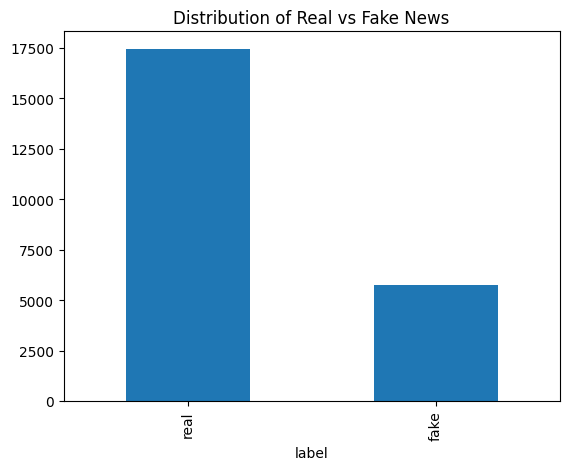

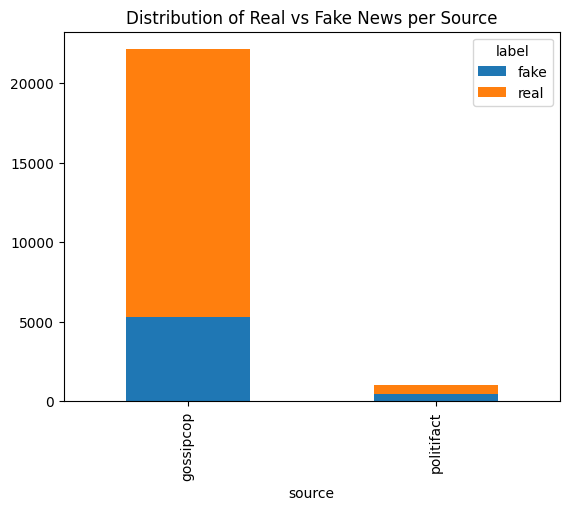

In [17]:
# Distribution of labels (real vs fake)
combined_df['label'].value_counts().plot(kind='bar', title='Distribution of Real vs Fake News')
plt.show()

# Optionally, check distribution per source (Politifact vs GossipCop)
combined_df.groupby(['source', 'label']).size().unstack().plot(kind='bar', stacked=True, title='Distribution of Real vs Fake News per Source')
plt.show()


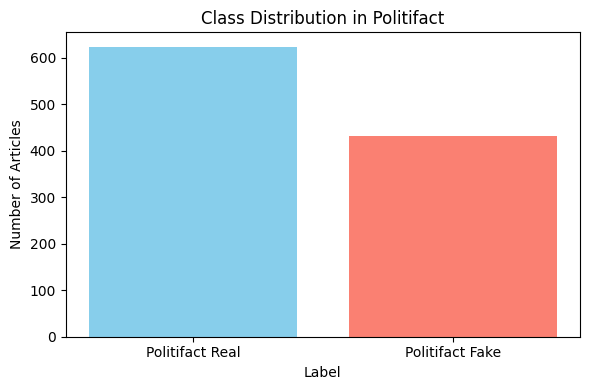

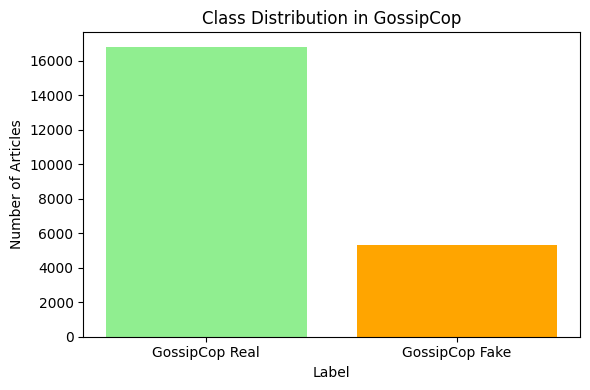

In [18]:
import matplotlib.pyplot as plt

# Data for Politifact and GossipCop separately
politifact_labels = ['Politifact Real', 'Politifact Fake']
politifact_values = [624, 432]

gossipcop_labels = ['GossipCop Real', 'GossipCop Fake']
gossipcop_values = [16817, 5323]

# Create a figure for Politifact
plt.figure(figsize=(6, 4))
plt.bar(politifact_labels, politifact_values, color=['skyblue', 'salmon'])
plt.title('Class Distribution in Politifact')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

# Create a figure for GossipCop
plt.figure(figsize=(6, 4))
plt.bar(gossipcop_labels, gossipcop_values, color=['lightgreen', 'orange'])
plt.title('Class Distribution in GossipCop')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


In [19]:
combined_df.to_csv('combined_df.csv', index=False)

##Text Length Analysis

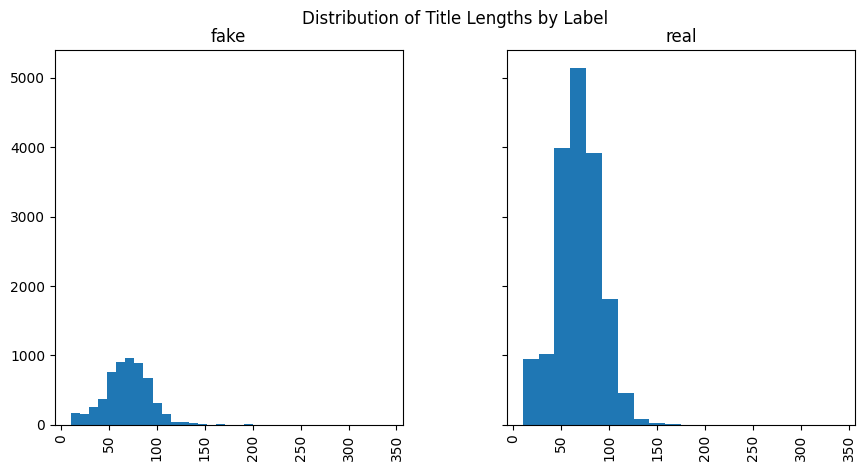

In [20]:
combined_df['title_length'] = combined_df['title'].apply(len)

# Plot the distribution of title lengths
combined_df.hist(column='title_length', by='label', bins=20, sharex=True, sharey=True, figsize=(10,5))
plt.suptitle('Distribution of Title Lengths by Label')
plt.show()


##Word Cloud Analysis

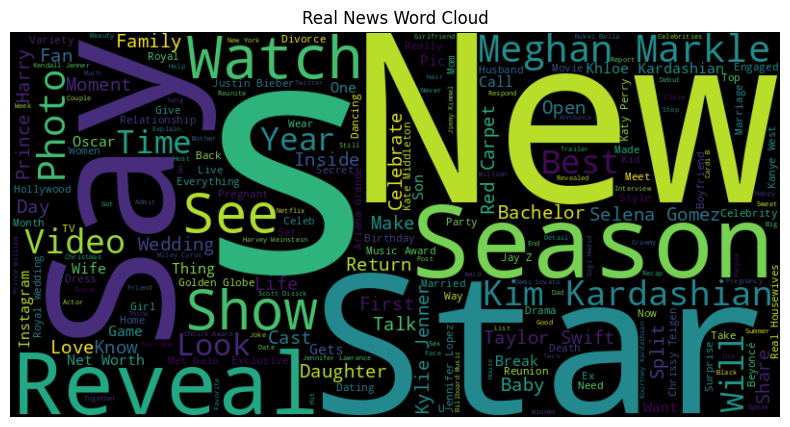

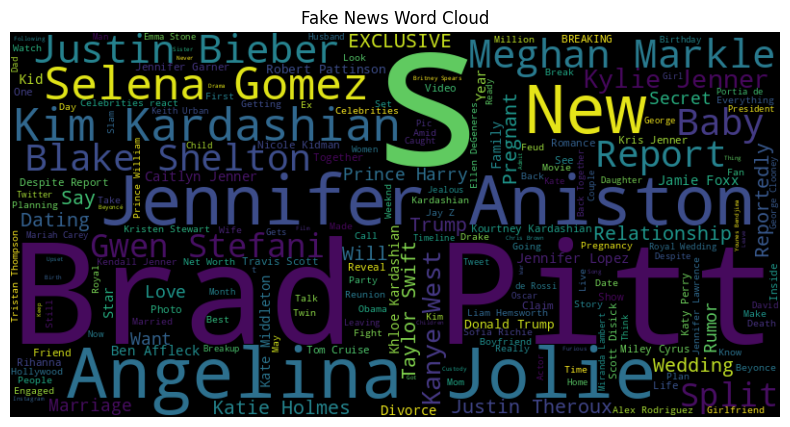

In [21]:
from wordcloud import WordCloud

real_titles = ' '.join(combined_df[combined_df['label'] == 'real']['title'])
fake_titles = ' '.join(combined_df[combined_df['label'] == 'fake']['title'])

real_wordcloud = WordCloud(width=800, height=400).generate(real_titles)
fake_wordcloud = WordCloud(width=800, height=400).generate(fake_titles)

# Display word clouds
plt.figure(figsize=(10,5))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()


##Most Frequent Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate real and fake news titles
real_titles = combined_df[combined_df['label'] == 'real']['title']
fake_titles = combined_df[combined_df['label'] == 'fake']['title']

# Vectorize the real and fake news titles separately
vectorizer = CountVectorizer(stop_words='english')

# Real news word frequencies
real_word_matrix = vectorizer.fit_transform(real_titles)
real_word_freq = pd.DataFrame(real_word_matrix.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

# Fake news word frequencies
fake_word_matrix = vectorizer.fit_transform(fake_titles)
fake_word_freq = pd.DataFrame(fake_word_matrix.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

print("Top words in Real News:\n", real_word_freq)
print("Top words in Fake News:\n", fake_word_freq)


Top words in Real News:
 new           831
2018          705
kardashian    703
season        627
awards        597
star          577
says          502
wedding       498
baby          495
kim           429
dtype: int64
Top words in Fake News:
 jennifer      482
kardashian    469
brad          414
pitt          394
jenner        384
justin        354
angelina      299
kim           293
jolie         291
aniston       281
dtype: int64


##Source-Specific Analysis

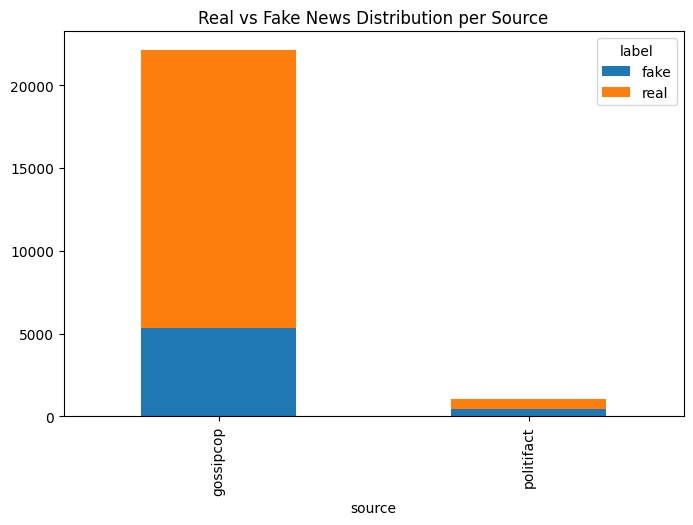

In [23]:
combined_df.groupby(['source', 'label']).size().unstack().plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Real vs Fake News Distribution per Source')
plt.show()


In [24]:
import seaborn as sns

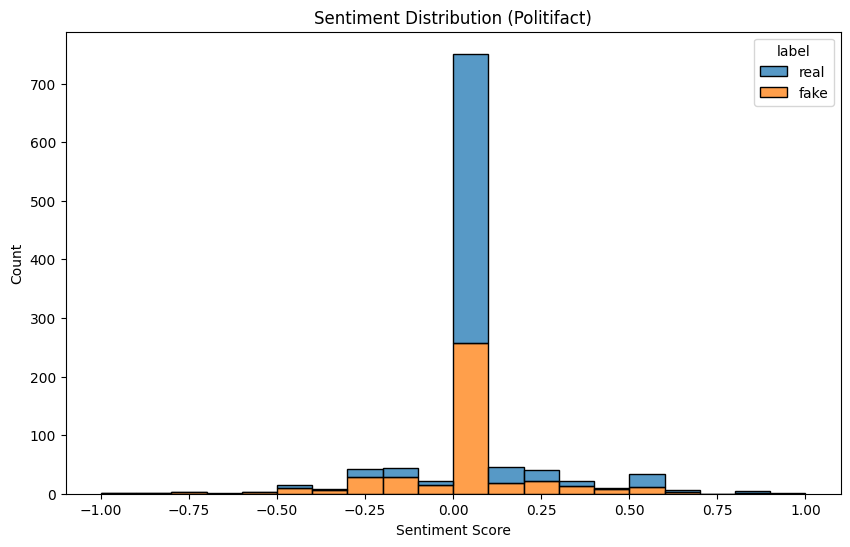

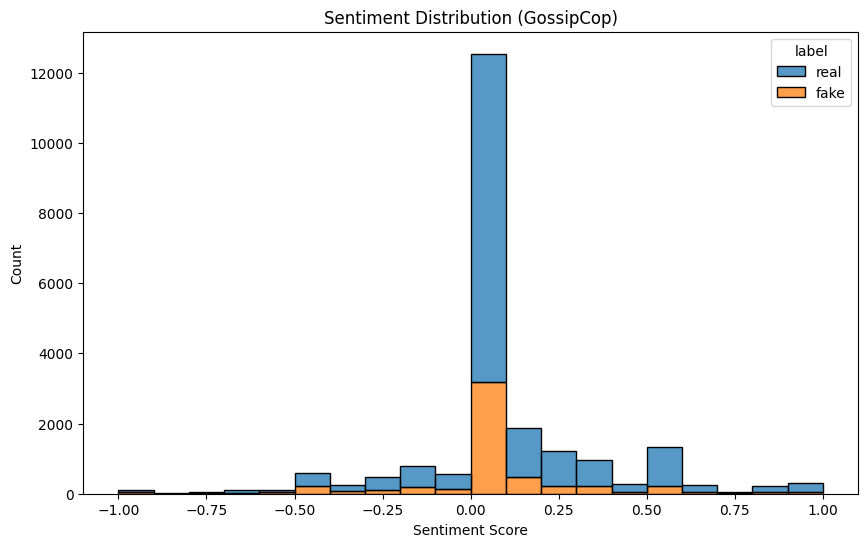

In [25]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Add sentiment scores
combined_df['sentiment'] = combined_df['title'].apply(get_sentiment)

# Sentiment distribution for Politifact
plt.figure(figsize=(10,6))
sns.histplot(data=combined_df[combined_df['source'] == 'politifact'], x='sentiment', hue='label', multiple='stack', bins=20)
plt.title('Sentiment Distribution (Politifact)')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# Sentiment distribution for GossipCop
plt.figure(figsize=(10,6))
sns.histplot(data=combined_df[combined_df['source'] == 'gossipcop'], x='sentiment', hue='label', multiple='stack', bins=20)
plt.title('Sentiment Distribution (GossipCop)')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top N n-grams
def get_top_n_ngrams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Politifact real and fake bigrams
politifact_real_bigrams = get_top_n_ngrams(combined_df[(combined_df['source'] == 'politifact') & (combined_df['label'] == 'real')]['title'], (2,2), 10)
politifact_fake_bigrams = get_top_n_ngrams(combined_df[(combined_df['source'] == 'politifact') & (combined_df['label'] == 'fake')]['title'], (2,2), 10)

# GossipCop real and fake bigrams
gossipcop_real_bigrams = get_top_n_ngrams(combined_df[(combined_df['source'] == 'gossipcop') & (combined_df['label'] == 'real')]['title'], (2,2), 10)
gossipcop_fake_bigrams = get_top_n_ngrams(combined_df[(combined_df['source'] == 'gossipcop') & (combined_df['label'] == 'fake')]['title'], (2,2), 10)

print("Top bigrams in Politifact Real News:\n", politifact_real_bigrams)
print("\nTop bigrams in Politifact Fake News:\n", politifact_fake_bigrams)
print("\nTop bigrams in GossipCop Real News:\n", gossipcop_real_bigrams)
print("\nTop bigrams in GossipCop Fake News:\n", gossipcop_fake_bigrams)


Top bigrams in Politifact Real News:
 [('week transcript', 18), ('remarks president', 17), ('barack obama', 16), ('presidential debate', 14), ('breaking news', 14), ('outlook office', 13), ('office skype', 13), ('skype bing', 13), ('bing breaking', 13), ('news latest', 13)]

Top bigrams in Politifact Fake News:
 [('donald trump', 18), ('hillary clinton', 8), ('president trump', 8), ('roy moore', 6), ('michelle obama', 6), ('white house', 6), ('new york', 5), ('malia obama', 5), ('breaking trump', 5), ('pope francis', 4)]

Top bigrams in GossipCop Real News:
 [('meghan markle', 316), ('kim kardashian', 308), ('taylor swift', 240), ('prince harry', 207), ('red carpet', 205), ('kylie jenner', 203), ('selena gomez', 196), ('khloe kardashian', 163), ('net worth', 144), ('music awards', 132)]

Top bigrams in GossipCop Fake News:
 [('brad pitt', 386), ('angelina jolie', 284), ('jennifer aniston', 266), ('kim kardashian', 240), ('selena gomez', 232), ('justin bieber', 204), ('meghan markle', 2

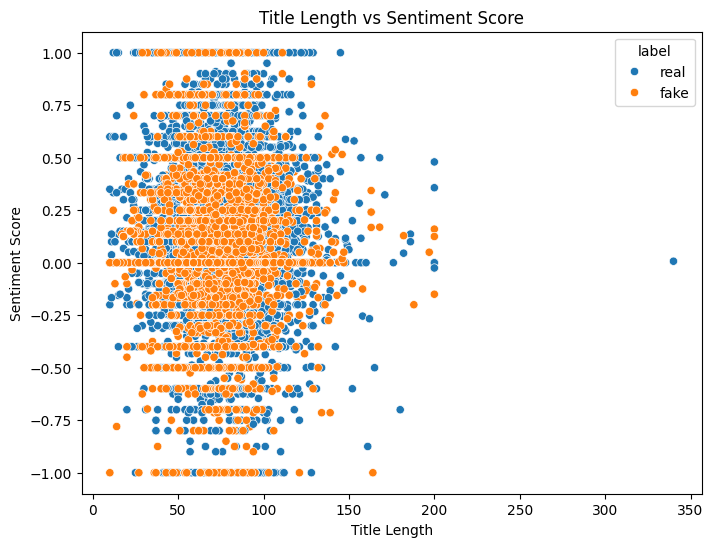

In [27]:
# Plot correlation between title length and sentiment
plt.figure(figsize=(8,6))
sns.scatterplot(x='title_length', y='sentiment', hue='label', data=combined_df)
plt.title('Title Length vs Sentiment Score')
plt.xlabel('Title Length')
plt.ylabel('Sentiment Score')
plt.show()


In [28]:
import nltk
from collections import Counter
nltk.download('averaged_perceptron_tagger')

# Function to get part of speech tags
def get_pos_tags(corpus):
    pos_tags = nltk.pos_tag(nltk.word_tokenize(corpus))
    pos_counts = Counter(tag for word, tag in pos_tags)
    return pos_counts

# Apply POS tagging to real and fake news titles
politifact_real_pos = combined_df[combined_df['label'] == 'real']['title'].apply(get_pos_tags)
politifact_fake_pos = combined_df[combined_df['label'] == 'fake']['title'].apply(get_pos_tags)

# Aggregating results to find the most common POS tags in real and fake news
real_pos_total = sum(politifact_real_pos, Counter())
fake_pos_total = sum(politifact_fake_pos, Counter())

print("Most Common POS Tags in Politifact Real News:\n", real_pos_total.most_common(10))
print("\nMost Common POS Tags in Politifact Fake News:\n", fake_pos_total.most_common(10))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


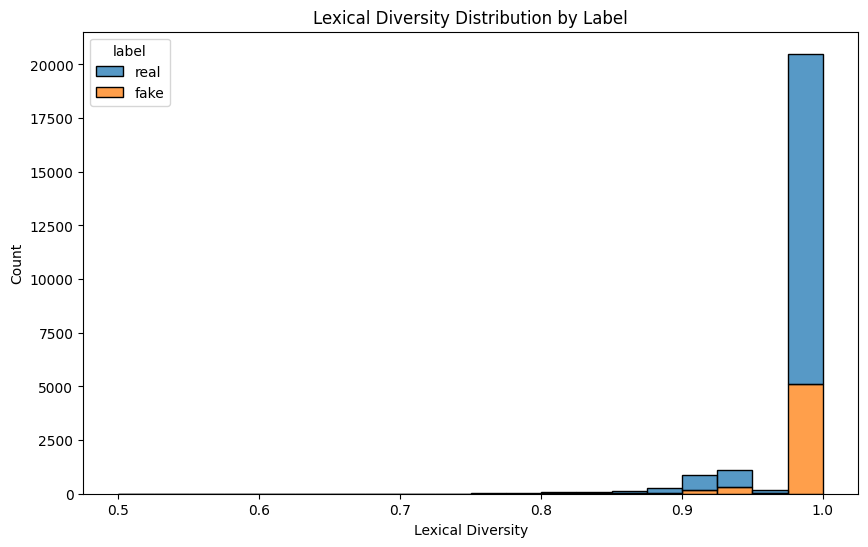

In [29]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

# Calculate lexical diversity for each title
combined_df['lexical_diversity'] = combined_df['title'].apply(lexical_diversity)

# Plot distribution of lexical diversity by label
plt.figure(figsize=(10,6))
sns.histplot(data=combined_df, x='lexical_diversity', hue='label', multiple='stack', bins=20)
plt.title('Lexical Diversity Distribution by Label')
plt.xlabel('Lexical Diversity')
plt.ylabel('Count')
plt.show()


In [30]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize titles using CountVectorizer for LDA
vectorizer = CountVectorizer(stop_words='english')
title_matrix = vectorizer.fit_transform(combined_df['title'])

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_matrix = lda_model.fit_transform(title_matrix)

# Display topics
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:
['news', 'middleton', 'royal', 'kate', 'harry', 'wedding', 'markle', 'prince', 'meghan', 'season']
Topic 1:
['swift', 'kanye', 'taylor', '2018', 'new', 'west', 'best', 'baby', 'kim', 'kardashian']
Topic 2:
['says', '2017', 'list', 'net', 'james', 'star', 'worth', '2018', 'tv', 'awards']
Topic 3:
['bieber', 'aniston', 'jolie', 'angelina', 'gomez', 'selena', 'pitt', 'brad', 'justin', 'jennifer']
Topic 4:
['star', 'jennifer', 'real', 'jackson', 'lopez', 'kendall', 'hadid', 'new', 'kylie', 'jenner']


In [31]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.0 MB/s eta 0:00:00


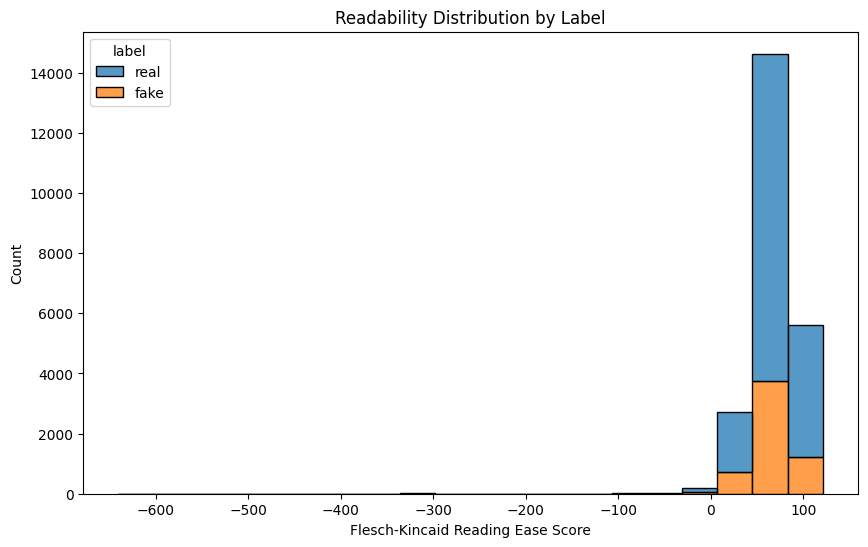

In [32]:
from textstat import flesch_reading_ease

# Function to get readability score
def get_readability(text):
    return flesch_reading_ease(text)

# Apply readability score to titles
combined_df['readability'] = combined_df['title'].apply(get_readability)

# Plot readability distribution by label
plt.figure(figsize=(10,6))
sns.histplot(data=combined_df, x='readability', hue='label', multiple='stack', bins=20)
plt.title('Readability Distribution by Label')
plt.xlabel('Flesch-Kincaid Reading Ease Score')
plt.ylabel('Count')
plt.show()


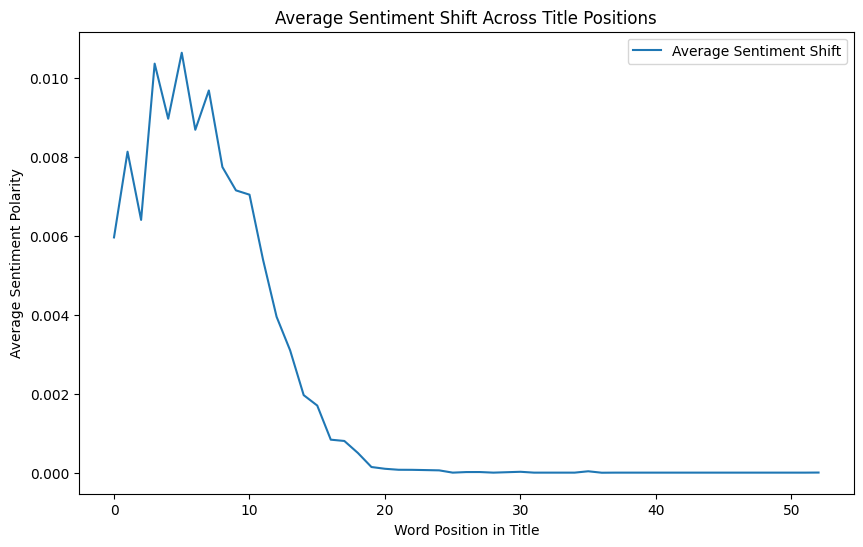

In [33]:
# Function to compute sentiment shift across the title
def sentiment_shift(title):
    words = title.split()
    sentiment_shifts = [TextBlob(word).sentiment.polarity for word in words]
    return sentiment_shifts

# Apply sentiment shift analysis
combined_df['sentiment_shift'] = combined_df['title'].apply(sentiment_shift)

# Visualize average sentiment shift across title positions
max_len = max(combined_df['title'].apply(lambda x: len(x.split())))
avg_sentiment_shift = [combined_df['sentiment_shift'].apply(lambda x: x[i] if i < len(x) else 0).mean() for i in range(max_len)]

plt.figure(figsize=(10,6))
plt.plot(range(max_len), avg_sentiment_shift, label='Average Sentiment Shift')
plt.title('Average Sentiment Shift Across Title Positions')
plt.xlabel('Word Position in Title')
plt.ylabel('Average Sentiment Polarity')
plt.legend()
plt.show()


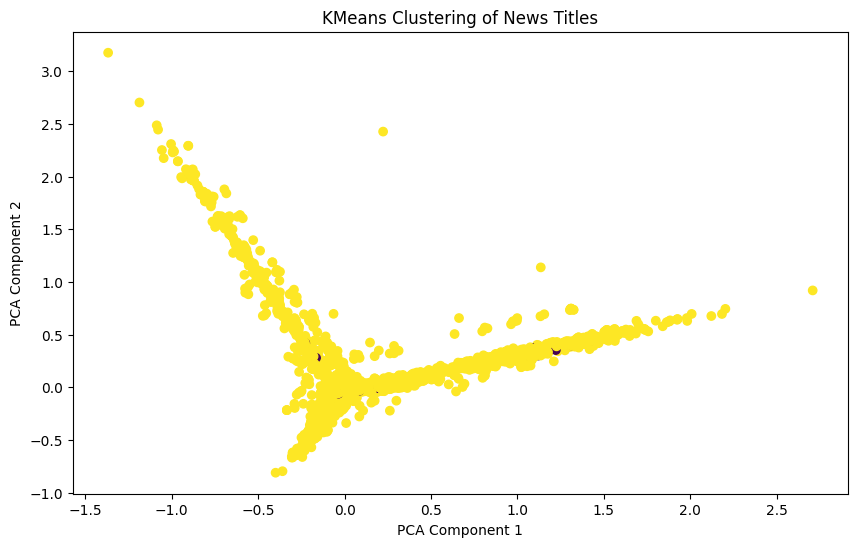

In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
title_matrix_reduced = pca.fit_transform(title_matrix.toarray())

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(title_matrix)

# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(title_matrix_reduced[:, 0], title_matrix_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering of News Titles')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['title'])

# Get top words by TF-IDF score
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
top_tfidf_words = tfidf_df.sum().sort_values(ascending=False).head(10)

print("Top words by TF-IDF score:\n", top_tfidf_words)


Top words by TF-IDF score:
 new           786.630651
kardashian    741.466347
2018          589.655251
season        564.252772
jennifer      550.148925
star          545.004897
baby          543.887593
says          511.283821
jenner        505.575337
wedding       462.425569
dtype: float64


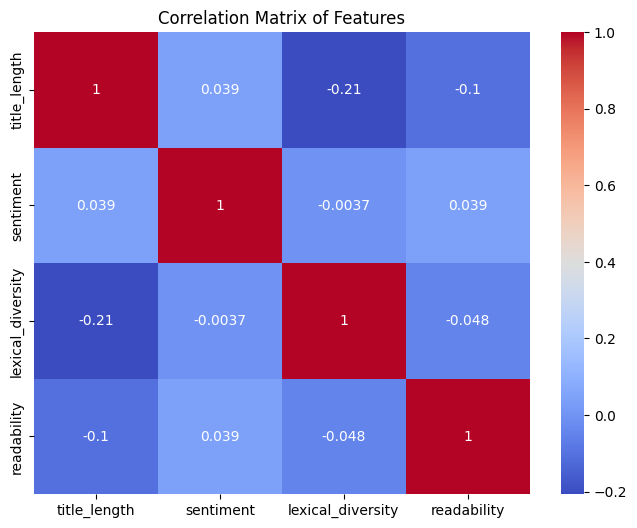

In [36]:
# Correlation matrix of numerical features
corr_matrix = combined_df[['title_length', 'sentiment', 'lexical_diversity', 'readability']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


In [37]:
pd.read_csv("dataset/combined_df.csv")

,id,title,source,label
0,politifact14984,National Federation of Independent Business,politifact,real
1,politifact12944,comments in Fayetteville NC,politifact,real
2,politifact333,"Romney makes pitch, hoping to close deal : Ele...",politifact,real
3,politifact4358,Democratic Leaders Say House Democrats Are Uni...,politifact,real
4,politifact779,"Budget of the United States Government, FY 2008",politifact,real
...,...,...,...,...
23191,gossipcop-6702260693,September 11: Celebrities Remember 9/11 (TWEETS),gossipcop,fake
23192,gossipcop-6051845337,NASCAR owners threaten to fire drivers who pro...,gossipcop,fake
23193,gossipcop-2435526162,The 7 signs that David Beckham is definitely h...,gossipcop,fake
23194,gossipcop-4576152851,Ryan Gosling and Eva Mendes Did Not Get Marrie...,gossipcop,fake


In [38]:
combined_df.head(5)

,id,title,source,label,title_length,sentiment,lexical_diversity,readability,sentiment_shift
0,politifact14984,National Federation of Independent Business,politifact,real,43,0.0,1.000000,-35.13,"[0.0, 0.0, 0.0, 0.0, 0.0]"
1,politifact12944,comments in Fayetteville NC,politifact,real,27,0.0,1.000000,75.88,"[0.0, 0.0, 0.0, 0.0]"
2,politifact333,"Romney makes pitch, hoping to close deal : Ele...",politifact,real,78,0.0,0.928571,84.68,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,politifact4358,Democratic Leaders Say House Democrats Are Uni...,politifact,real,73,0.0,1.000000,68.77,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,politifact779,"Budget of the United States Government, FY 2008",politifact,real,47,0.0,1.000000,71.82,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [39]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23196 entries, 0 to 5322
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 23196 non-null  object 
 1   title              23196 non-null  object 
 2   source             23196 non-null  object 
 3   label              23196 non-null  object 
 4   title_length       23196 non-null  int64  
 5   sentiment          23196 non-null  float64
 6   lexical_diversity  23196 non-null  float64
 7   readability        23196 non-null  float64
 8   sentiment_shift    23196 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.8+ MB


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [41]:
# Assuming combined_df is your dataframe
# Encode target variable
label_encoder = LabelEncoder()
combined_df['label'] = label_encoder.fit_transform(combined_df['label'])


In [44]:
# Convert lists in 'sentiment_shift' to strings, handling NaN values
combined_df['sentiment_shift'] = combined_df['sentiment_shift'].apply(
    lambda x: ','.join(map(str, x)) if isinstance(x, list) else (x if isinstance(x, str) else '')
)

# Now apply One-Hot Encoding
combined_df = pd.get_dummies(combined_df, columns=['sentiment_shift', 'source'], drop_first=True)


In [42]:
# Define features (X) and target (y)
X = combined_df.drop(columns=['id', 'title', 'label'])  # Drop unnecessary columns
y = combined_df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression with class weighting
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


TypeError: unhashable type: 'list'

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [46]:
# Step 1: Apply TF-IDF to the 'title' column
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # You can adjust max_features as needed
title_tfidf = tfidf_vectorizer.fit_transform(combined_df['title'])

In [47]:
# Step 2: Prepare Other Features and Target Variable
X_other = combined_df.drop(columns=['id', 'title', 'label'])  # Drop 'id', 'title', and target column
y = combined_df['label']  # Target variable

In [48]:
# Combine TF-IDF matrix with the other features
X = hstack([X_other, title_tfidf])  # Concatenate sparse matrices

TypeError: no supported conversion for types: (dtype('O'), dtype('float64'))

In [49]:

# Ensure all columns in X_other are numeric by checking dtypes
print(X_other.dtypes)

title_length                                                                             int64
sentiment                                                                              float64
lexical_diversity                                                                      float64
readability                                                                            float64
sentiment_shift_-0.05,0.0,0.0,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0       bool
                                                                                        ...   
sentiment_shift_1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625                             bool
sentiment_shift_1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5                                   bool
sentiment_shift_1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625                                 bool
sentiment_shift_1.0,0.0,0.5,0.0                                                           bool
source_politifact                                 

In [50]:
# Convert boolean columns to integer (0 and 1)
X_other = X_other.astype(int)

# Combine TF-IDF matrix with the other features
from scipy.sparse import hstack
X = hstack([X_other, title_tfidf])  # Concatenate sparse matrices


## Logistic regression

In [52]:
# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train Logistic Regression with class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)
logreg.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.62      0.53      1151
           1       0.86      0.76      0.81      3489

    accuracy                           0.73      4640
   macro avg       0.66      0.69      0.67      4640
weighted avg       0.76      0.73      0.74      4640

Confusion Matrix:
 [[ 714  437]
 [ 827 2662]]
AUC-ROC Score: 0.7526289027025237
